In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


--2023-07-13 22:59:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  57.2KB/s    in 1.2s    

2023-07-13 22:59:15 (57.2 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
features = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
features.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [5]:
features.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


In [6]:
def plot(x,x_label):
    plt.scatter(features.ENGINESIZE, x, color="blue")
    plt.xlabel("Engine Size")
    plt.ylabel(x_label) 
    plt.show()

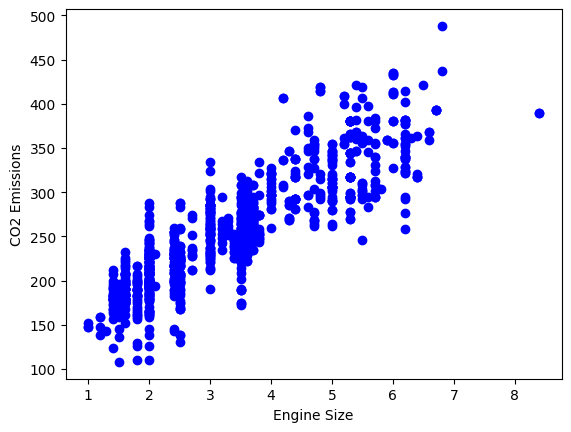

In [7]:
plot(features.CO2EMISSIONS, "CO2 Emissions")

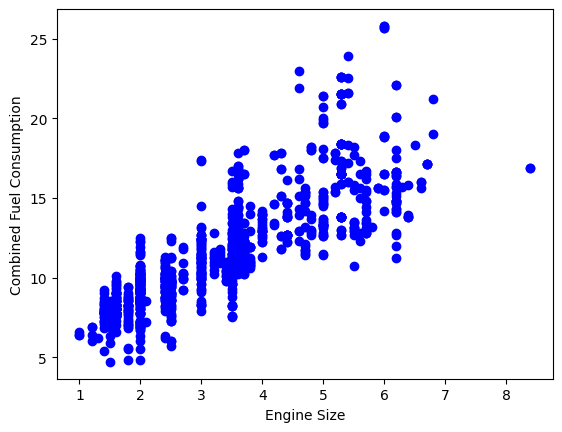

In [8]:
plot(features.FUELCONSUMPTION_COMB, "Combined Fuel Consumption")

In [9]:
feature_set =  features
rnd = np.random.rand(len(feature_set)) < 0.8
train = features[rnd] 
test = features[~rnd]


model = linear_model.LinearRegression()
x_train = np.asarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asarray(train[['CO2EMISSIONS']])
model.fit(x_train,y_train)
yhat = model.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x_test = np.asarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asarray(test[['CO2EMISSIONS']])


print("Residual sum of squares: %.2f"% np.mean((y_test - yhat) ** 2))

print('Variance score: %.2f' % model.score(x_test, y_test))

Residual sum of squares: 671.03
Variance score: 0.83


In [10]:
feature_set =  features
rnd = np.random.rand(len(feature_set)) < 0.8
train = features[rnd] 
test = features[~rnd]


model = linear_model.LinearRegression()
x_train = np.asarray(train[['ENGINESIZE','CYLINDERS',"FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY"]])
y_train = np.asarray(train[['CO2EMISSIONS']])
model.fit(x_train,y_train)
yhat = model.predict(test[['ENGINESIZE','CYLINDERS',"FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY"]])
x_test = np.asarray(test[['ENGINESIZE','CYLINDERS',"FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY"]])
y_test = np.asarray(test[['CO2EMISSIONS']])


print("Residual sum of squares: %.2f"% np.mean((y_test - yhat) ** 2))

print('Variance score: %.2f' % model.score(x_test, y_test))

Residual sum of squares: 478.55
Variance score: 0.87
